Classification: Decision Tree 
Dataset: pima-indians-diabetes.csv Create & 
evaluate the decision tree. 
Test the decision tree for any random sample. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('pima-indians-diabetes.csv')

# Display the first few rows to inspect the data
print(data.head())


   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Split the data into features (X) and target (y)
X = data.drop('1', axis=1)  # Features here '1' is the outcome column
y = data['1']  # Target variable


6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (613, 8)
Testing data shape: (154, 8)


In [8]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Generate the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 68.83%
Confusion Matrix:
[[71 26]
 [22 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        97
           1       0.57      0.61      0.59        57

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154



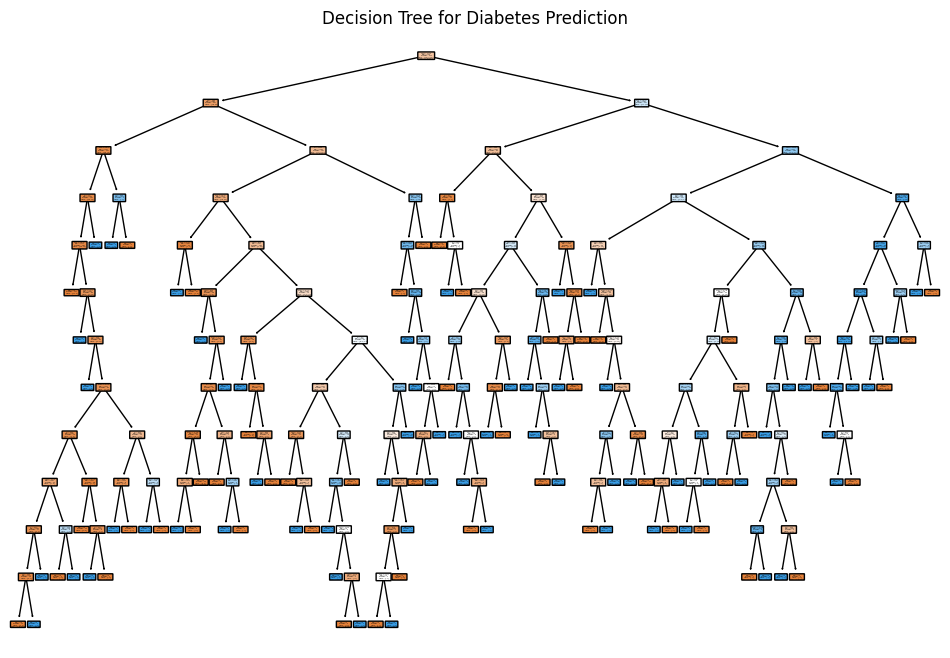

In [11]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree for Diabetes Prediction')
plt.show()


In [21]:
# Test the decision tree with a random sample
sample = X_test.sample(1, random_state=42)
print("Sample features:", sample)

# Make prediction for the sample
sample_prediction = dt_classifier.predict(sample)
print(f"Prediction for the sample: {'Diabetes' if sample_prediction[0] == 1 else 'No Diabetes'}")


Sample features:       6  148  72  35  0  33.6  0.627  50
356  13  129   0  30  0  39.9  0.569  44
Prediction for the sample: Diabetes
